<center>
    <h1> ILI285 - Computación Científica I  / INF285 - Computación Científica </h1>
    <h2> Tarea 4 </h2>
    <h2> [S]cientific [C]omputing [T]eam </h2>
</center>

_Mayo 2017_


- **Nombre:** Hernán Herreros Niño
- **Email:** [hernan.herreros.13@sansano.usm.cl](mailto:hernan.herreros.13@sansano.usm.cl)
- **Rol:** 201373081-7


---

<div id='intro' />
# 1. Introducción

En el presente laboratorio se analizarán distintos métodos, tanto iterativos como no iterativos, para resolver sistemas de ecuaciones lineales y así diferenciar su rendimiento y efectividad


In [1]:
%matplotlib inline
import scipy as sp
import numpy as np
from scipy.linalg import solve
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib.mlab as mlab
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.pyplot as plt
from ipywidgets.widgets import interact
from ipywidgets import widgets
import matplotlib
import matplotlib.cm as cm

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['axes.titlesize'] = 16
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16

---

In [22]:
def palu(A, b):
    P, L, U = sp.linalg.lu(A)
    Pb = P@b
    # LUx = Pb => Lc = Pb; Ux = c
    # Primero se resuelve Lc = Pb
    c = sp.linalg.solve_triangular(L, Pb, lower=True)
    # Luego se resuelve Ux = c
    x = sp.linalg.solve_triangular(U, c, lower=False)
    return x.T

In [14]:
def visual_original(n_steps_newton=2,x00=0.5,x01=2):
    # Vector form of the initial guess
    x0=np.array([x00,x01])

    # The functions to be solved
    f1v=np.vectorize(lambda x,y: y-x**2)
    f2v=np.vectorize(lambda x,y: x**2+y**2-1)
    nf1f2v=np.vectorize(lambda x,y: np.linalg.norm(np.array([f1v(x,y),f2v(x,y)])))
    
    # The jacobian matrix for f1 and f2
    JM=np.vectorize(lambda x,y: np.array([[-2*x,1],[2*x,2*y]]))

    # Creating matrix to store all approximations made by the Newton's method
    xs=np.zeros((2,n_steps_newton+1))
    xs[:,0]=x0

    # Applying Newton's method n_steps_newton
    for n in np.arange(n_steps_newton):
        b=np.array([[f1v(xs[0,n],xs[1,n])],[f2v(xs[0,n],xs[1,n])]])
        # HINT: HERE IS WHERE YOU NEED TO USE PALU OR GAUSS-SEIDEL!!!
        xs[:,n+1]=xs[:,n]-np.linalg.solve(JM(xs[0,n],xs[1,n]),b).T

    # Data for plotting
    x = np.linspace(-2.0, 2.0, 100)
    y = np.linspace(-2.0, 2.0, 100)
    [X,Y]=np.meshgrid(x,y)

    # Visualization! It is very important you learn about visualization in general.
    plt.figure(figsize=(15,7.5))
    
    plt.subplot(1, 2, 1)
    CS = plt.pcolor(X,Y,nf1f2v(X,Y))
    plt.contour(X, Y, f1v(X,Y), levels=[0], colors='k')
    plt.contour(X, Y, f2v(X,Y), levels=[0], colors='k')
    plt.colorbar(CS)
    plt.plot(xs[0,:],xs[1,:],'.r',markersize=5)
    plt.plot(xs[0,:],xs[1,:],'-r')
    plt.axis('tight')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    f1_at_x0=float(f1v(xs[0,-1],xs[1,-1]))
    f2_at_x0=float(f2v(xs[0,-1],xs[1,-1]))
    nf1f2v_at_x0=float(nf1f2v(xs[0,-1],xs[1,-1]))
    plt.title('Plotting $f_1=${:.16f},\n $f_2=${:.16f},\n $\|[f_1,f_2]\|_2=${:.16f}, \n $x_n=${:.16f}\n and $y_n=${:.16f}'.format(f1_at_x0,f2_at_x0,nf1f2v_at_x0,xs[0,-1],xs[1,-1]))
    
    plt.subplot(1, 2, 2)
    x_i=xs[0,:]
    y_i=xs[1,:]
    plt.semilogy(np.arange(n_steps_newton+1),np.abs(f1v(x_i,y_i)),'.',label='$|f_1|$',markersize=20)
    plt.semilogy(np.arange(n_steps_newton+1),np.abs(f2v(x_i,y_i)),'d',label='$|f_2|$',markersize=15,alpha=0.5)
    plt.semilogy(np.arange(n_steps_newton+1),np.abs(nf1f2v(x_i,y_i)),'s',label='$\|[f_1,f_2]\|$',markersize=12,alpha=0.5)
    plt.xlabel('n (Número de iteraciones)')
    plt.grid(True)
    plt.legend(loc='best')
    
    plt.show()

#interact(visual_original,n_steps_newton=(1,15),x00=(-2,2,0.1),x01=(-2,2,0.1))

<p style="font-size:16px"> A continuación se les entregará una función para visualizar los resultados de los métods iterativos al analizar paso a paso. </p>

In [40]:
def visual(n_steps_newton=2,x00=0.5,x01=2):
    # Vector form of the initial guess
    x0=np.array([x00,x01])

    # The functions to be solved
    f1v=np.vectorize(lambda x,y: y-x**2)
    f2v=np.vectorize(lambda x,y: x**2+y**2-1)
    nf1f2v=np.vectorize(lambda x,y: np.linalg.norm(np.array([f1v(x,y),f2v(x,y)])))
    
    # The jacobian matrix for f1 and f2
    JM=np.vectorize(lambda x,y: np.array([[-2*x,1],[2*x,2*y]]))

    # Creating matrix to store all approximations made by the Newton's method
    xs=np.zeros((2,n_steps_newton+1))
    xs[:,0]=x0

    # Applying Newton's method n_steps_newton
    for n in np.arange(n_steps_newton):
        b=np.array([[f1v(xs[0,n],xs[1,n])],[f2v(xs[0,n],xs[1,n])]])
        # HINT: HERE IS WHERE YOU NEED TO USE PALU OR GAUSS-SEIDEL!!!
        xs[:,n+1]=xs[:,n]-palu(JM(xs[0,n],xs[1,n]),b)

    # Data for plotting
    x = np.linspace(-2.0, 2.0, 100)
    y = np.linspace(-2.0, 2.0, 100)
    [X,Y]=np.meshgrid(x,y)

    # Visualization! It is very important you learn about visualization in general.
    plt.figure(figsize=(15,7.5))
    
    plt.subplot(1, 2, 1)
    CS = plt.pcolor(X,Y,nf1f2v(X,Y))
    plt.contour(X, Y, f1v(X,Y), levels=[0], colors='k')
    plt.contour(X, Y, f2v(X,Y), levels=[0], colors='k')
    plt.colorbar(CS)
    plt.plot(xs[0,:],xs[1,:],'.r',markersize=5)
    plt.plot(xs[0,:],xs[1,:],'-r')
    plt.axis('tight')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    f1_at_x0=float(f1v(xs[0,-1],xs[1,-1]))
    f2_at_x0=float(f2v(xs[0,-1],xs[1,-1]))
    nf1f2v_at_x0=float(nf1f2v(xs[0,-1],xs[1,-1]))
    plt.title('Plotting $f_1=${:.16f},\n $f_2=${:.16f},\n $\|[f_1,f_2]\|_2=${:.16f}, \n $x_n=${:.16f}\n and $y_n=${:.16f}'.format(f1_at_x0,f2_at_x0,nf1f2v_at_x0,xs[0,-1],xs[1,-1]))
    
    plt.subplot(1, 2, 2)
    x_i=xs[0,:]
    y_i=xs[1,:]
    plt.semilogy(np.arange(n_steps_newton+1),np.abs(f1v(x_i,y_i)),'.',label='$|f_1|$',markersize=20)
    plt.semilogy(np.arange(n_steps_newton+1),np.abs(f2v(x_i,y_i)),'d',label='$|f_2|$',markersize=15,alpha=0.5)
    plt.semilogy(np.arange(n_steps_newton+1),np.abs(nf1f2v(x_i,y_i)),'s',label='$\|[f_1,f_2]\|$',markersize=12,alpha=0.5)
    plt.xlabel('n (Número de iteraciones)')
    plt.grid(True)
    plt.legend(loc='best')
    
    plt.show()

---

<h3> PALU: </h3>
<p style="font-size:16px"><b>a) </b> Dentro de la función visual, reemplazar la <code>función np.linalg.solve</code> (destacado en comentarios) con el método <b>PALU</b> para resolver el sistema de ecuaciones, para los puntos iniciales indicados más abajo, ¿Que observaciones puede destacar del comportamiento del método  y las soluciones encontradas? ¿Existen mejoras si aumenta el número de iteraciones? ¿Cuantas iteraciones se necesitan para saturar la solución?</p>

1. **(5 puntos)** $\mathbf{x}_0=\langle1,2\rangle$
2. **(10 puntos)** $\mathbf{x}_0=\langle0,2\rangle$
3. **(15 puntos)** $\mathbf{x}_0=\langle-2,-2\rangle$

Para el caso de $\mathbf{x_0} = \langle 1,2 \rangle$, la solución se satura en la sexta (6ª) iteración por lo que aumentar el número de iteraciónes en el metodo de gauss no causará efecto alguno.

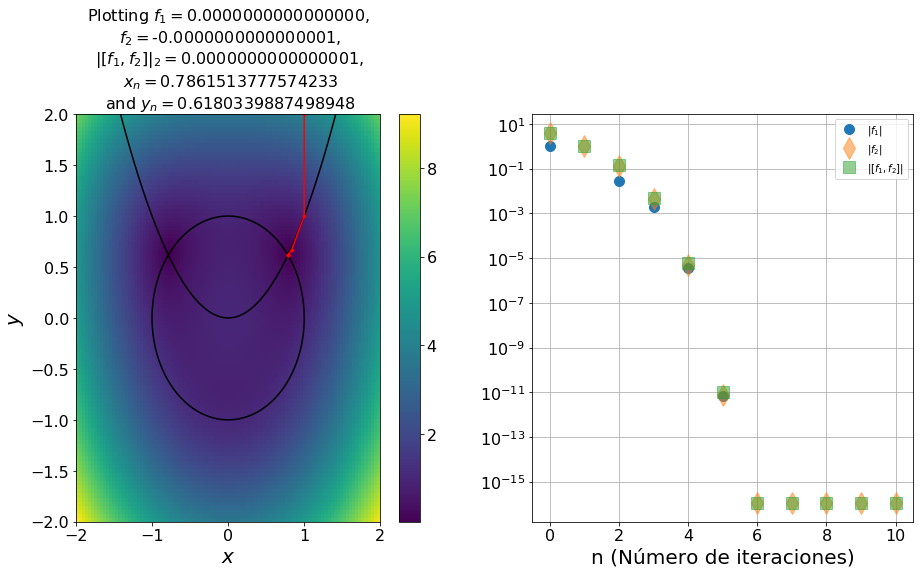

In [41]:
#interact(visual,n_steps_newton=(1,20),x00=(-2,2,0.1),x01=(-2,2,0.1))
visual(n_steps_newton=10, x00=1.0, x01=2.0)

Para el caso de $\mathbf{x_0} = \langle 0, 2 \rangle$, no se obtiene una solución ya que se obtiene el error 

>``` python 
array must not contain infs or NaNs 
```

Esto se debe a que la matriz Jacobiana de A es singular y por lo tanto, las matrices L y U quedan con valores NaN.


In [42]:
#interact(visual,n_steps_newton=(1,10),x00=(-2,2,0.1),x01=(-2,2,0.1))
#Descomentar la siguiente linea para que se muestre el error
#visual(n_steps_newton=10, x00=0, x01=2.0) 

Para $\mathbf{x_0} = \langle -2, -2 \rangle$, la solución diverge por lo que no es posible encontrar una solución. Esta divergencia puede deberse a que el _initial guess_ esta muy lejos de la solución real, por lo tanto no es capaz de encontrar solución.

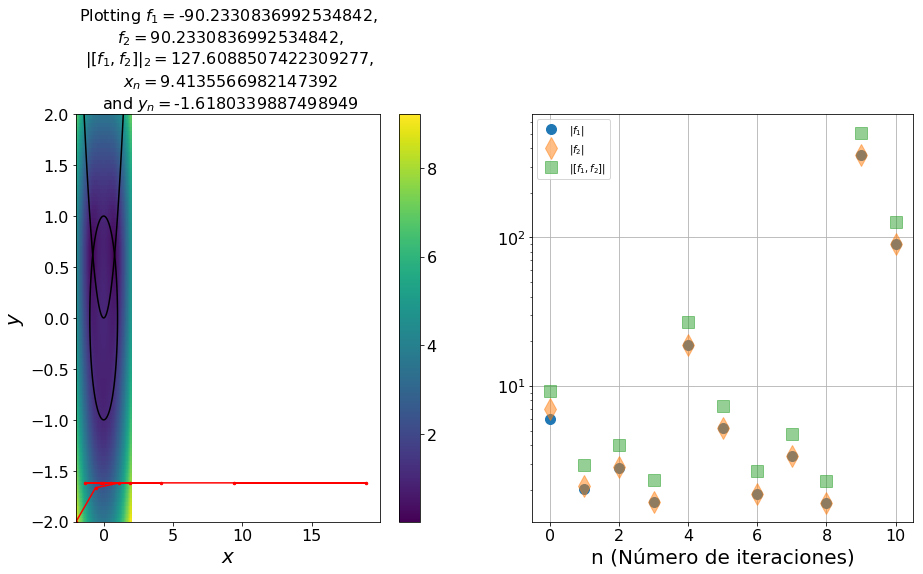

In [75]:
#interact(visual,n_steps_newton=(1,20),x00=(-2,2,0.1),x01=(-2,2,0.1))
visual(n_steps_newton=10, x00=-2.0, x01=-2.0)

---

In [8]:
def GS(A, b, steps, x0):
    L = np.tril(A, k=-1)
    D = np.diag((np.diag(A)))
    U = np.triu(A, k=1)
    LD_inv = sp.linalg.solve_triangular(L+D, np.identity(L.shape[0]), lower=True)
    x0 = x0[np.newaxis].T
    for n in range(steps):
        x0 = (LD_inv@(b - U@x0))
    return(np.array(x0.T))

In [50]:
def visual2(n_steps_newton=2,n_steps_gauss=50,x00=0.5,x01=2):
    # Vector form of the initial guess
    x0=np.array([x00,x01])

    # The functions to be solved
    f1v=np.vectorize(lambda x,y: y-x**2)
    f2v=np.vectorize(lambda x,y: x**2+y**2-1)
    nf1f2v=np.vectorize(lambda x,y: np.linalg.norm(np.array([f1v(x,y),f2v(x,y)])))
    
    # The jacobian matrix for f1 and f2
    JM=np.vectorize(lambda x,y: np.array([[-2*x,1],[2*x,2*y]]))

    # Creating matrix to store all approximations made by the Newton's method
    xs=np.zeros((2,n_steps_newton+1))
    xs[:,0]=x0

    # Applying Newton's method n_steps_newton
    for n in np.arange(n_steps_newton):
        b=np.array([[f1v(xs[0,n],xs[1,n])],[f2v(xs[0,n],xs[1,n])]])
        # HINT: HERE IS WHERE YOU NEED TO USE PALU OR GAUSS-SEIDEL!!!
        xs[:,n+1]=xs[:,n]-GS(JM(xs[0,n],xs[1,n]),b, n_steps_gauss, xs[:,0])

    # Data for plotting
    x = np.linspace(-2.0, 2.0, 100)
    y = np.linspace(-2.0, 2.0, 100)
    [X,Y]=np.meshgrid(x,y)

    # Visualization! It is very important you learn about visualization in general.
    plt.figure(figsize=(15,7.5))
    
    plt.subplot(1, 2, 1)
    CS = plt.pcolor(X,Y,nf1f2v(X,Y))
    plt.contour(X, Y, f1v(X,Y), levels=[0], colors='k')
    plt.contour(X, Y, f2v(X,Y), levels=[0], colors='k')
    plt.colorbar(CS)
    plt.plot(xs[0,:],xs[1,:],'.r',markersize=5)
    plt.plot(xs[0,:],xs[1,:],'-r')
    plt.axis('tight')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    f1_at_x0=float(f1v(xs[0,-1],xs[1,-1]))
    f2_at_x0=float(f2v(xs[0,-1],xs[1,-1]))
    nf1f2v_at_x0=float(nf1f2v(xs[0,-1],xs[1,-1]))
    plt.title('Plotting $f_1=${:.16f},\n $f_2=${:.16f},\n $\|[f_1,f_2]\|_2=${:.16f}, \n $x_n=${:.16f}\n and $y_n=${:.16f}'.format(f1_at_x0,f2_at_x0,nf1f2v_at_x0,xs[0,-1],xs[1,-1]))
    
    plt.subplot(1, 2, 2)
    x_i=xs[0,:]
    y_i=xs[1,:]
    plt.semilogy(np.arange(n_steps_newton+1),np.abs(f1v(x_i,y_i)),'.',label='$|f_1|$',markersize=20)
    plt.semilogy(np.arange(n_steps_newton+1),np.abs(f2v(x_i,y_i)),'d',label='$|f_2|$',markersize=15,alpha=0.5)
    plt.semilogy(np.arange(n_steps_newton+1),np.abs(nf1f2v(x_i,y_i)),'s',label='$\|[f_1,f_2]\|$',markersize=12,alpha=0.5)
    plt.xlabel('n (Número de iteraciones)')
    plt.grid(True)
    plt.legend(loc='best')
    
    plt.show()

<h3> Métodos Iterativos: </h3>
<p style="font-size:16px"><b>b)</b> (1) Acople el método iterativo de <b>Gauss-Seidel</b> al visualizador (llamelo visual2), (2) incluya un cuarto parametro al widget para controlar el número de iteraciones de <b>Gauss-Seidel</b>, (3) use el algoritmo implementado para los siguientes puntos iniciales indicados más abajo. En ambos casos ¿Como afecta el número de iteraciones en la convergencia de la solución? </p>

1. **(30 puntos)** Construir visual2: (1) Acoplando Gauss-Seidel y (2) Incluyendo un cuarto parámetro al widget
2. **(10 puntos)** $\mathbf{x}_0=\langle1,2\rangle$
3. **(10 puntos)** $\mathbf{x}_0=\langle-2,-2\rangle$

Para $\mathbf{x_0} = \langle 1, 2 \rangle$, el análisis varia dependiendo de la cantidad de pasos que se le de al método de _Gauss-Seidel_, para un número no muy elevado de iteraciones el algoritmo converge en una solución que no es 100% correcta y/o precisa. Al aumentar el número de iteraciones de _Gauss-Seidel_ a 200, la solución converge. La solución se satura en la sexta (6ª) iteración de _Newton_.

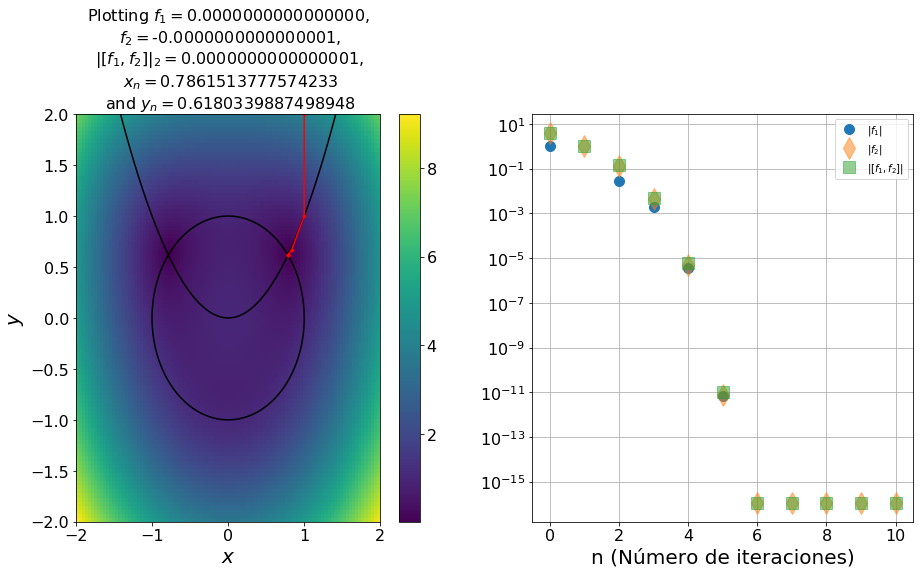

In [88]:
#interact(visual2,n_steps_newton=(1,20),n_steps_gauss=(1,400),x00=(-2,2,0.1),x01=(-2,2,0.1))
visual2(n_steps_newton=10, n_steps_gauss=200, x00=1.0, x01=2.0)

Para $\mathbf{x_0} = \langle -2, -2 \rangle$, la solución no converge, por más iteraciones que se le den a _Newton_ y _Gauss-Seidel_.

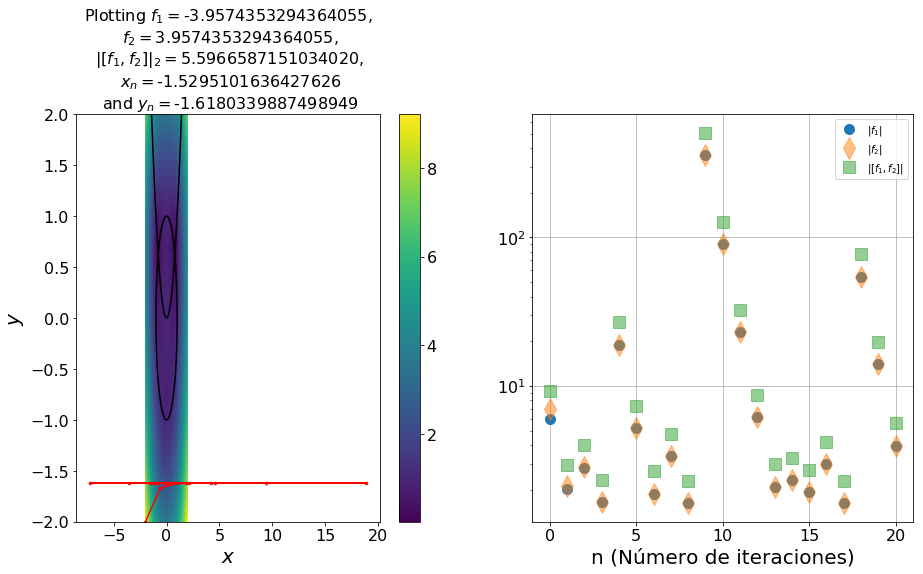

In [86]:
#interact(visual2,n_steps_newton=(1,20),n_steps_gauss=(1,100),x00=(-2,2,0.1),x01=(-2,2,0.1))
visual2(n_steps_newton=20, n_steps_gauss=500, x00=-2.0, x01=-2.0)

<p style="font-size:16px"><b>c) (20 Puntos)</b> Respecto al análisis realizado en el punto anterior, ¿Que información se desprende del segundo gráfico? ¿Que medida corresponde la curva $\|[f_1 , f_2]\|_2$ ? </p>

El segundo gráfico muestra los valores que van tomando las funciones $f_1$ y $f_2$ para así analizar y entender su comportamiento. 

$\|[f_1 , f_2]\|_2$ corresponde a la norma del vector de la función $f_1$ y $f_2$ evaluado en los puntos dados. Esta norma muestra la relación de ambas funciones en un punto especifico, cuando es 0 significa que ambas funciones dan 0 en el punto evaluado.

---

Se pudo apreciar las variaciones que presentaban las soluciones al implementar distintos métodos y el como la cantidad de iteraciónes para el método de _Gauss-Seidel_ afectaba el resultado. A decir verdad, en cuanto a efectividad, los algoritmos con ambos métodos no retornaban soluciónes muy diferentes, por ejemplo, para los puntos $\mathbf{x_0} = \langle 1, 2 \rangle$, en ambos se obtuvo le mismo resultado, pero para $\mathbf{x_0} = \langle -2, -2 \rangle$ a pesar de que las soluciones divergen, dada una cantidad n de iteraciones, los resultados diferían bastante.

# Instrucciones:
 
 
* La estructura del laboratorio es la siguiente:
     1. Título, nombre de estudiante, email y rol.
     2. Introducción.
     3. Desarrollo y análisis de resultados.
     4. Conclusiones.
     5. Referencias.
* El laboratorio debe ser realizado en `Jupyter` notebook (`Python3`).
* Se evaluará la correcta utilización de librerias `NumPy`, `SciPy`, `SymPy`, `Matplotlib` y `ipywidgets`, así como la correcta implementación de algoritmos vectorizados cuando se indique.
* El archivo de entrega debe denominarse Tarea4-rol.tar.gz, y debe contener un directorio con todos los archivos necesarios para ejecutar el notebook, junto con un archivo README indicando explícitamente las librerías o módulos utilizados.
* El descuento por día de atraso será de $30$ puntos, con un máximo de 1 día de atraso. No se recibirán entregas después de este día.
* El trabajo es personal, no se permite compartir código, aunque sí se sugiere discutir aspectos generales con sus compañeros. En caso de sospecha de copia, se citará a los involucrados a defender sus conocimientos de manera presencial, evaluación cuya nota reemplazará la obtenida en la tarea.
* El no seguir estas instrucciones, implica descuentos en su nota obtenida.

# Referencias
- https://www.quantstart.com/articles/LU-Decomposition-in-Python-and-NumPy
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.diag.html